Step 0: Import packages

In [33]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pytictoc import TicToc
import time

Step 1: Setting Parameters

In [60]:
# Particles Data
particles = 1000   # Number of particles, should be 1000
starting_height = 1   # Starting height
d = 1000   # Density of detonation material (Kg/m3), assuming all equal
M = 5 * 10**(-2)   # Total mass (Kg)
drag_eff = 1   # Drag efficiency for drag heating 
rag_eff = 0.5   # Radiation efficiency for radiation heating
E = 1   # Detonation energy (J)
temp_initial = 1500   # Initial temperature (K)
m = (M / particles) * (1 + (1.9 * np.random.random_sample((particles, 1)) - 0.95))   # Mass of particles (Kg)
R = ((3 * m) / (4 * np.pi * d))**(1/3)   # Radius of circular particle (m)
A = np.pi * (R**(2))   # Circular cross sectional area (m2)
SA = 4 * np.pi * (R**(2))   # Surface Area (m2)


# Air and Nature Properties
p_air = 1.225   # Density of air (Kg/m3)
u_air = 1.8 * 10**(-5)   # Viscosity of air (Kg/(m*s))
v_surr = np.array([[0.1,0,0]])   # Surrounding velocity
C = 1900   # Heat capacity ((J/K)-Kg)  
temp_air = 293.15 #Temperature of air in Kelvin
g = np.array([[0,0,-9.81]])   # Force of gravity
K = 0.025596    # Conductivity of air (W/K * m)
Pr = (C * u_air)/ K    #(C * u_air)/K, Prandtl Number


# Other parameters
t_step = 10**(-1)   # Seconds per step (seconds)
duration = 10   # Duration of simulation (seconds)

Step 2: Initializing Model

In [62]:
#Setting particles starting position
r_particle_start = (2 * np.random.random_sample((particles, 3)) + (-1))/10
r_particle_start[:,2] = r_particle_start[:,2] + 10 
r_mass_start = (1/np.sum(m)) * np.sum(m * r_particle_start, axis = 0)

#Setting particles starting velocity
v_particle_start = np.sqrt((2 * E)/ np.sum(m)) * ((r_particle_start - r_mass_start) / np.linalg.norm(r_particle_start - r_mass_start, axis = 1)[:, None])

# Setting initial temperature
t_particle_start = Temp * np.ones((particles,1), dtype = float)  

# Setting Reynolds number

# Defining drag coefficient function
def drag_coeff(Reynolds_number):
    if Reynolds_number <= 1:
        cd = 24/Reynolds_number
    elif Reynolds_number <= 400:
        cd = 24/(Reynolds_number**0.646)
    elif Reynolds_number <= 3 * 10**(5):
        cd = 0.5
    elif Reynolds_number <= 2 * 10**(6):
        cd = 3.66 * 10**(-4) * Reynolds_number**(0.4275)
    else:
        cd = 0.18
    return cd   


Step 3: Simulation - Starting position

<IPython.core.display.Javascript object>


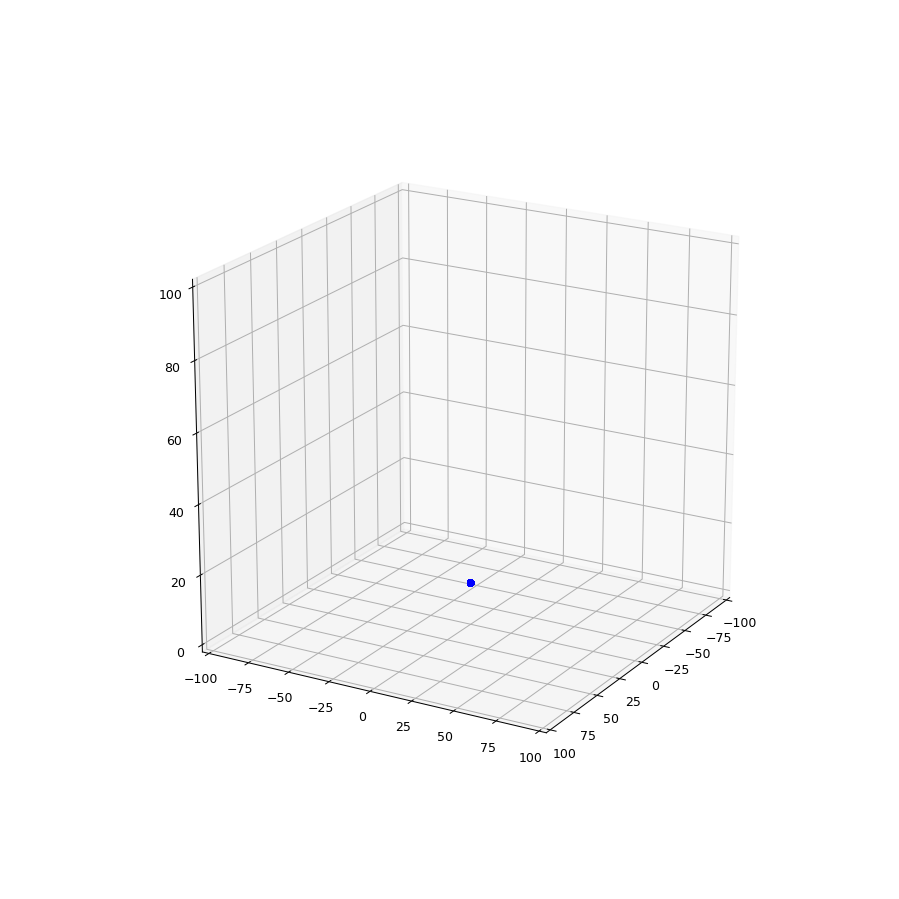

In [10]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(r_particle_start[:,0], r_particle_start[:,1], zs = r_particle_start[:,2], zdir='z', s=20, c='Blue', depthshade=True)
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(0, 100)
ax.view_init(20, 30)
plt.show()

c:\users\carlos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
c:\users\carlos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.


<IPython.core.display.Javascript object>


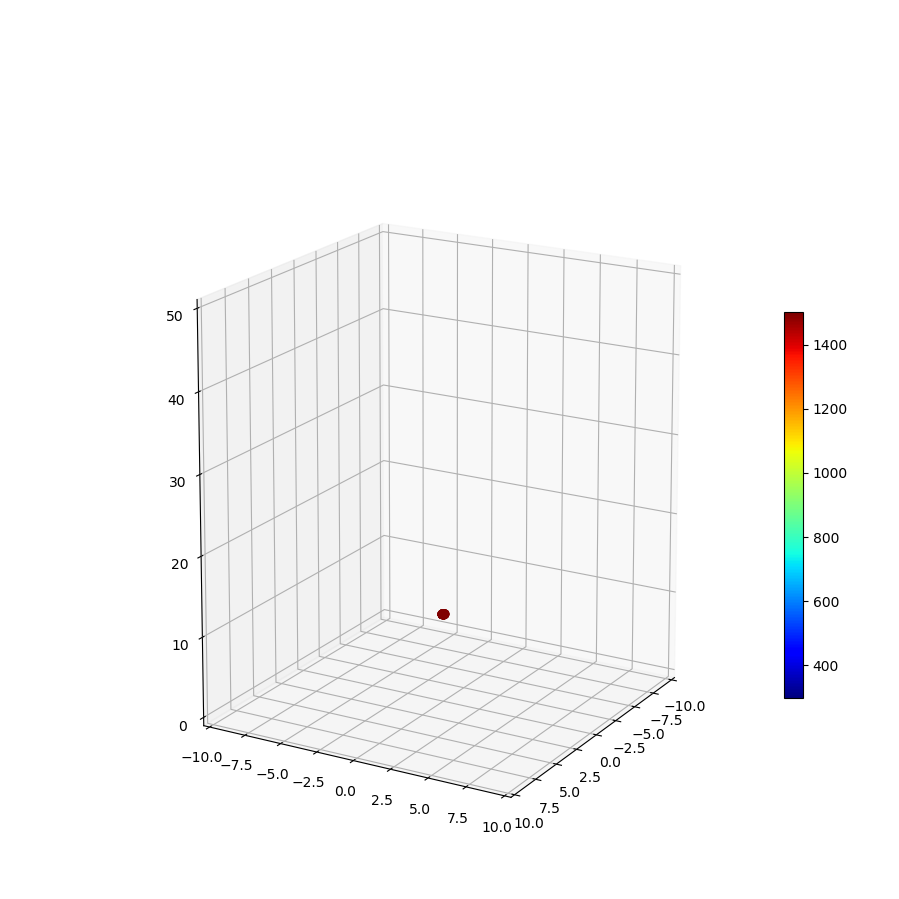

1000 Success
Current time: 0


<IPython.core.display.Javascript object>


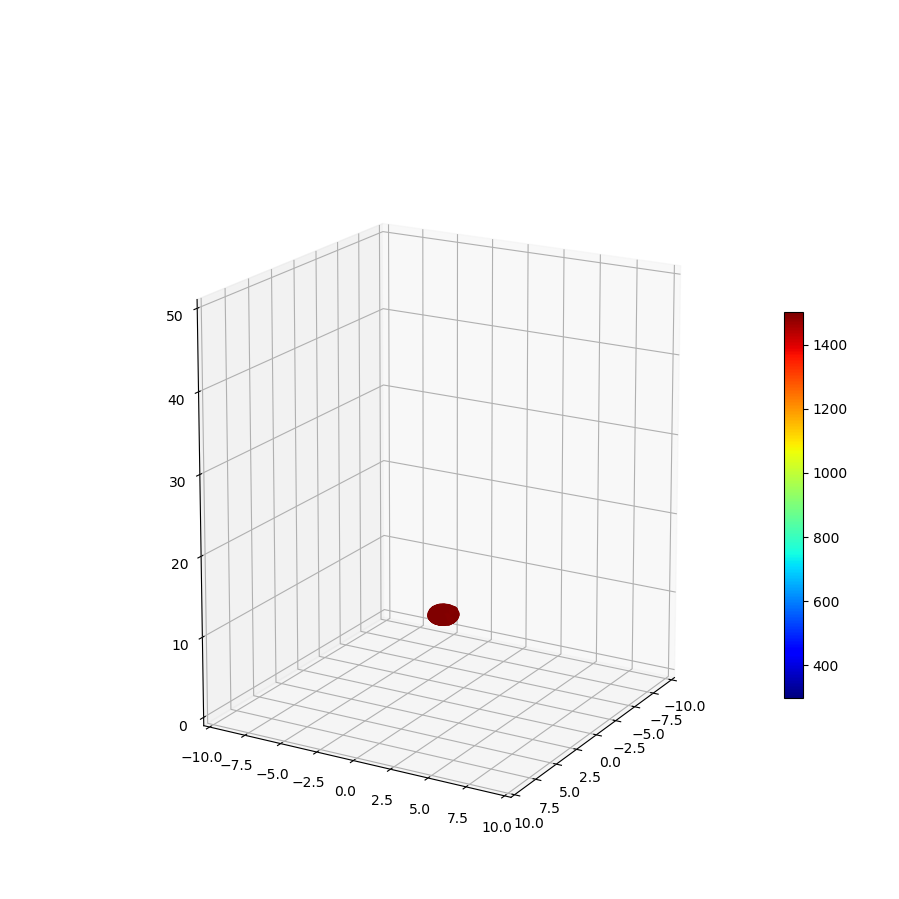

KeyboardInterrupt: 

In [66]:
timer = 0
count = 1000
v_particle = np.zeros((particles,3))
r_particle = np.zeros((particles,3))
t = TicToc()
t.tic()
while timer < duration:
    v_particle[:,2] = v_particle_start[:,2] - g[0][2] * timer
    Re_particle = (p_air * 2 * R * np.linalg.norm(v_surr - v_particle, axis = 1)[:, None]) / u_air
    Nu_particle = 2 + (0.4 * Re_particle ** (1/2) + 0.06 * Re_particle ** (2/3)) * (Pr ** 0.4)
    h_particle = (Nu_particle * K) / (2 * R)
    r_particle[:,2] = r_particle_start[:,2] + v_particle_start[:,2] * timer + (1/2) * g[0][2]  * timer**(2)
    r_particle[:,0:2] = r_particle_start[:,0:2] + v_particle_start[:,0:2] * timer
    temp_particle = ((temp_initial - temp_air) * np.exp(-((h_particle * A * timer) / (m * C)))) + temp_air
    #t_particle = (t_particle_start-Temp_air) * np.exp((-))
    fig = plt.figure(figsize = [10,10])
    ax = plt.axes(projection='3d')
    ignition_plot = ax.scatter(r_particle[:,0], r_particle[:,1], zs = r_particle[:,2], c=temp_particle[:,0], 
                               cmap = 'jet', zdir='z', s=20, vmin=300, vmax=1500, depthshade=True)
    fig.colorbar(ignition_plot, ax = ax, shrink = 0.5)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(0, 50)
    ax.view_init(15, 30)

    #filename='C:\\Users\\Carlos\Documents\\Carlos\\Universidad\\UC - Berkeley - Posgrado\\Capstone Project\
    #\Image\\Fire_'+str(count)+'.png'
    #plt.savefig(filename, dpi=96)
    plt.show(ax)
    fig.canvas.draw()
    time.sleep(1)
    print(str(count) + ' Success')
    print('Current time: ' + str(timer))
    timer = timer + t_step
    count = count + 1
t.toc()